# Bank Churn Prediction

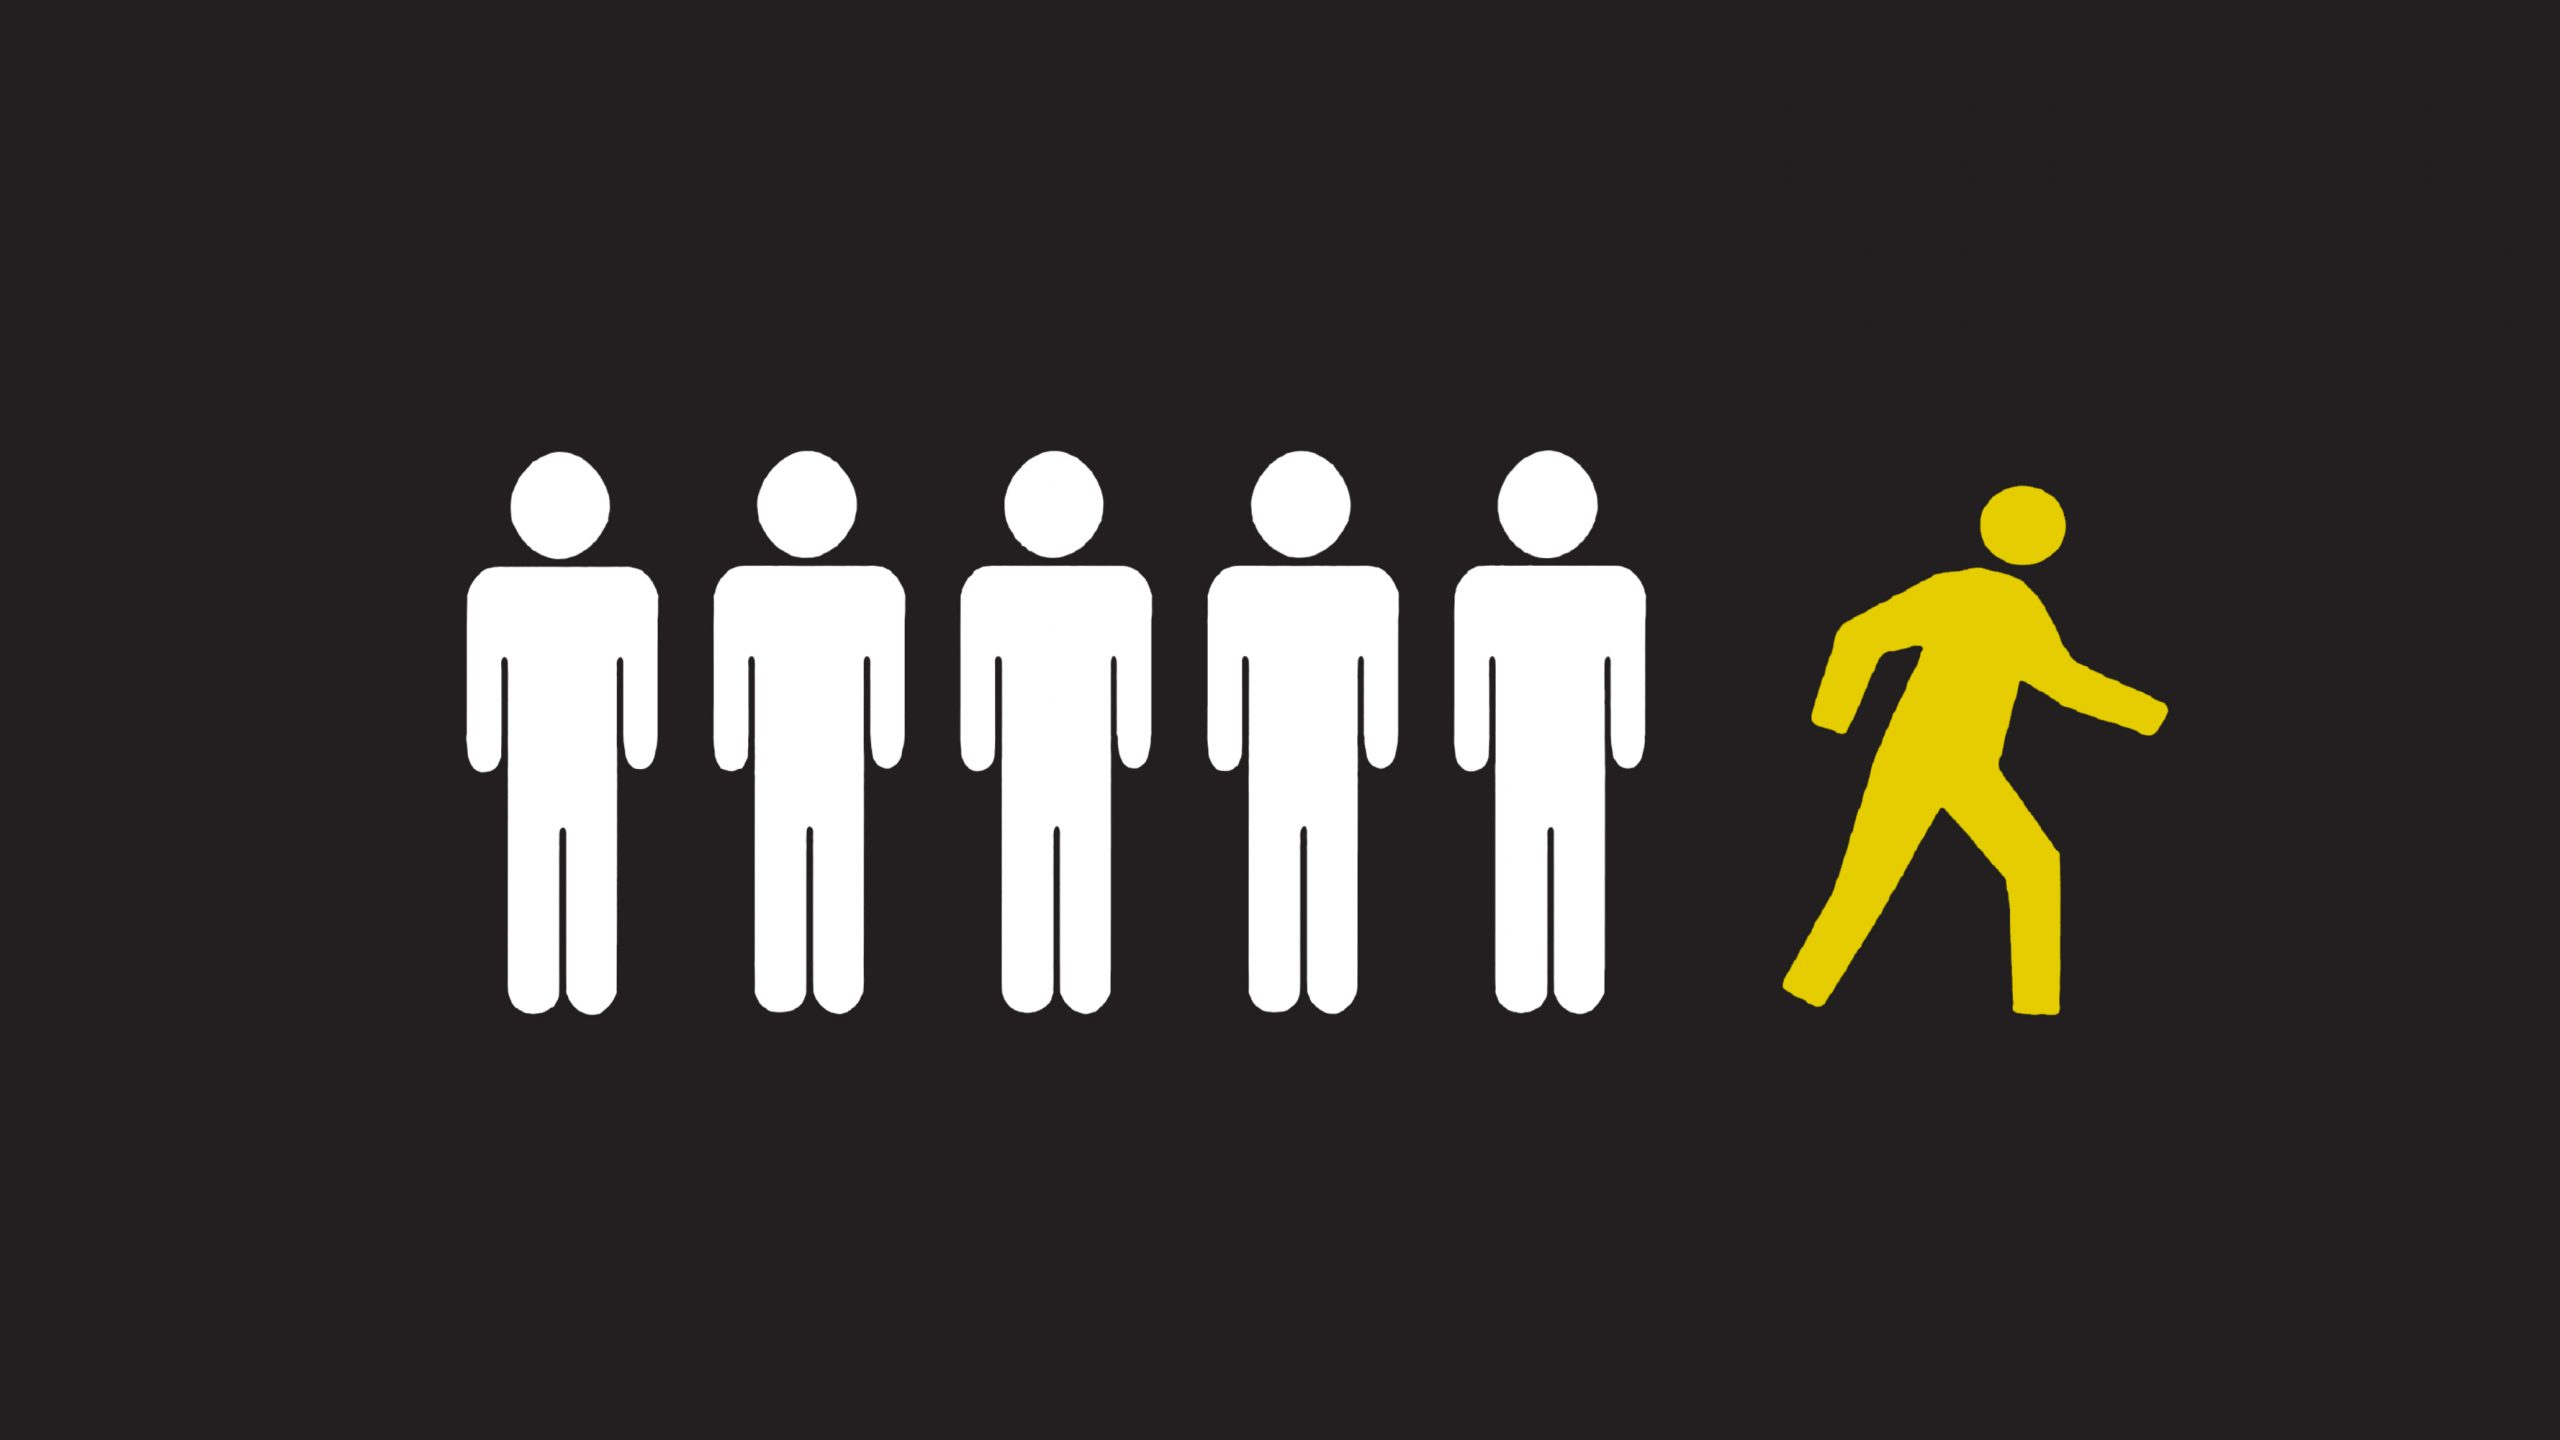

Banking is one of those traditional industries that has gone through a steady transformation over the decades. Yet, many banks today with a sizeable customer base hoping to gain a competitive edge have not tapped into the vast amounts of data they have, especially in solving one of the most acknowledged problems – customer churn.

**Machine Learning in Banking Sector**



In the banking context, machine learning can be used to generate actionable insights using enormous databases that banks collect. Whether it’s a history of transactions, chat logs with bank representatives, or corporate documentation, machine learning models can help banks process and analyze this data to have a deeper understanding of their consumers and internal processes. With machine learning in banking, financial institutions can streamline fraud detection, optimize credit underwriting, improve regulatory compliance, and strengthen customer engagement.

**Churn prediction** is when businesses predict which clients are at risk to churn (stop using their service). Customers usually offer some warning before being churned, hence churn prediction systems primarily focus on customer behavior to identify specific customers who are likely to churn out and indicate reasons for the churn. Such factors would aid marketing to develop effective retention strategies, increasing overall customer lifetime value, and assisting in growing the company’s market value.

**Benefits of Analyzing Customer Churn Prediction to Banking Sector**


1.   Increase profits: The ultimate goal of churn analysis is to reduce churn and increase profits. As more customers stay longer, revenue should increase, and profits should follow.

2.   Improving the customer experience: Understanding why customers churn, banks can better understand their priorities, identify bank's weaknesses, and improve the overall customer experience.

3.   Optimize products and services: If customers are leaving because of specific issues with product or service, banks have an opportunity to improve. Implementing these insights reduces customer churn and improves the overall product or service for future growth.

4.   Customer retention: A company can retain customers and continue to generate revenue from them. High customer loyalty enables companies to increase the profitability of their existing customers and maximize their lifetime value






Losing a customer is costly for any buisness. Banks can have a chance to retain valuable clients who are likely to close an account or switch to a competitor if they are identified early on

Task: To reduce customer loss for a bank with customer churn prediction (CCP). ‘Churn’ is defined as customers of a given bank do not update their account (i.e., debit/credit card) when it expires.

**Business Problem**

What: How to reduce customer loss for a bank with customer churn prediction (CCP). 

Why: Identifying customers who are likely to close their accounts or switch to a competitor early on gives the bank a chance to retain valuable clients and help banks allocate resources effectively.

**Process**

We first have to do some Exploratory Data Analysis in the Dataset, then fit the dataset into Machine Learning Classification Algorithm and choose the best Algorithm for the Bank Customer Churn Dataset.

# About dataset

Size of the dataset is 1**0,000**. This dataset is for ABC Multistate bank with following columns:

**customer_id**, unused variable - Stores unique identification for each customer (Numeric data type - Integer)

**credit_score**, used as input - A credit score is a prediction of your credit behavior, such as how likely you are to pay a loan back on time, based on information from your credit reports.(Numeric data type - Integer)

**country**, used as input - Residing Country of the customer (String Data type)

**gender**, used as input. (String Data type - Male / Female)

**age**, used as input.(Numeric data type - Integer)

**tenure**, used as input - From how many years he/she is having bank acc in ABC Bank (Numeric data type - Integer)

**balance**, used as input - Account Balance (Numeric data type - Float)

**products_number**, used as input - Number of Product from bank (Numeric data type - Integer)

**credit_card**, used as input - Does this customer have credit card ? (Numeric data type - Integer where 0 is for No and 1 is for Yes)

**active_member**, used as input - Is he/she is active Member of bank ?(Numeric data type - Integer where 0 is for No and 1 is for Yes)

**estimated_salary**, used as input - Estimated Salary of the Customer(Numeric data type - Float)

**churn**, used as the target - 1 if the client has left the bank during some period or 0 if he/she has not.



# Understanding the data

In [2]:
#Necessary Libraries
import pandas as pd
import seaborn as sns
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats as stats
from scipy.stats import skew, kurtosis, shapiro

In [4]:
df= pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [5]:
df.shape

(10000, 12)

In [6]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.isnull().any().unique()

array([False])

**This dataset is for ABC Multistate bank has no null values**

In [10]:
df.duplicated().sum()

0

**This dataset is for ABC Multistate bank has no duplicate values**

---



In [11]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})
report(df)

,Column,d_type,unique_sample,n_uniques
0,customer_id,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
1,credit_score,int64,"[619, 608, 502, 699, 850]",460
2,country,object,"[France, Spain, Germany]",3
3,gender,object,"[Female, Male]",2
4,age,int64,"[42, 41, 39, 43, 44]",70
5,tenure,int64,"[2, 1, 8, 7, 4]",11
6,balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78]",6382
7,products_number,int64,"[1, 3, 2, 4]",4
8,credit_card,int64,"[1, 0]",2
9,active_member,int64,"[1, 0]",2


**This function calculates the number of unique values in all columns and gives us a sample for the same.**

**For example:** In column customer_id we have 10000 unique values and for column country we have 3 unique values given (France,Spain, Germany).


In [12]:
df[['age', 'credit_score', 'balance', 'estimated_salary', 'churn']].groupby('churn').agg(["min","max","std","mean"])

age                           credit_score                               \
      min max        std       mean          min  max         std        mean   
churn                                                                           
0      18  92  10.125363  37.408389          405  850   95.653837  651.853196   
1      18  84   9.761562  44.837997          350  850  100.321503  645.351497   

      balance                                        estimated_salary  \
          min        max           std          mean              min   
churn                                                                   
0         0.0  221532.80  62848.040701  72745.296779            90.07   
1         0.0  250898.09  58360.794816  91108.539337            11.58   

                                               
             max           std           mean  
churn                                          
0      199992.48  57405.586966   99738.391772  
1      199808.10  57912.418071  101465.677531

**This code gives us statistical description( min, max, standard deviation, mean) for columns 
(age,credit_score,balance,estimated_salary) with respect to the target column churn.**

**Target Variable**

---



In [13]:
df['churn'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    79.6%
1    20.4%
Name: churn, dtype: object

**The data is highly imbalanced as the percentage of 1(1-the client has left the bank during some period) and 0(0 -the client has not left the bank during some period) is 79.6 and 20.4 resepectively.**

Churn: 20.37 %

Retention: 79.63 %



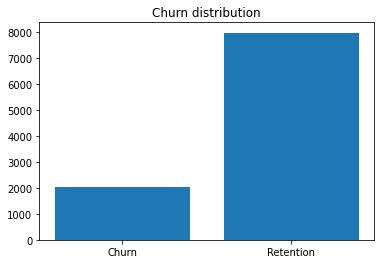

In [14]:
plt.bar(['Churn', 'Retention'], [df['churn'].sum(), df['churn'].shape[0]-df['churn'].sum()])
plt.title('Churn distribution')
print("Churn:",round(df['churn'].sum()/df.shape[0] *100, 2), '%\n')
print("Retention:",round((df['churn'].shape[0]-df['churn'].sum())/df.shape[0] *100, 2), '%\n')

Exploring the Features

#### Country/ Gender

<AxesSubplot:title={'center':'Countries'}>

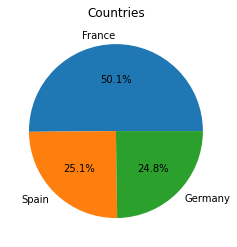

In [15]:
pd.crosstab(index=df.country,columns='count',normalize=True).plot(
    kind='pie',autopct='%.1f%%',y='count',
    labels=df.country.unique(),
    ylabel='',title='Countries',legend=False)

**The French branches make up a huge portion of the customer base with 50.1% followed by Spain 25.1% and Germany 24.8%.**

In [16]:
by_country = df.groupby(['country'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('country')
by_country

,country,churn,ratio
0,France,0,0.838452
1,France,1,0.161548
2,Germany,0,0.675568
3,Germany,1,0.324432
4,Spain,0,0.833266
5,Spain,1,0.166734


[Text(0.5, 1.0, 'Churned Probability with country')]

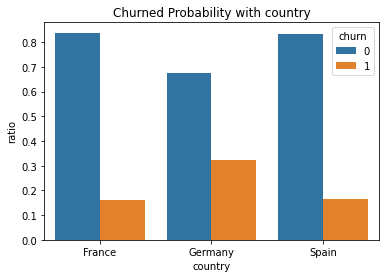

In [17]:
sns.barplot(x='country',y='ratio', hue='churn', data=by_country).set(title = 'Churned Probability with country')

**German branches recorded the highest churn rate with 32% hence further analysis would be required to determine why.**

<AxesSubplot:title={'center':'Gender'}>

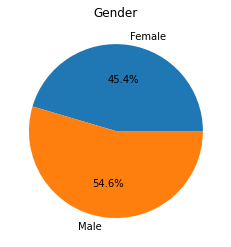

In [18]:
pd.crosstab(index=df.gender,columns='count',normalize=True).plot(
    kind='pie',autopct='%.1f%%',y='count',
    labels=df.gender.unique(),
    ylabel='',title='Gender',legend=False)

**The dataset had Male majority with 54.6 % followed by Female 45.4%**

In [19]:
by_gender = df.groupby(['gender'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('gender')
by_gender

,gender,churn,ratio
0,Female,0,0.749285
1,Female,1,0.250715
2,Male,0,0.835441
3,Male,1,0.164559


[Text(0.5, 1.0, 'Churned Probability with gender')]

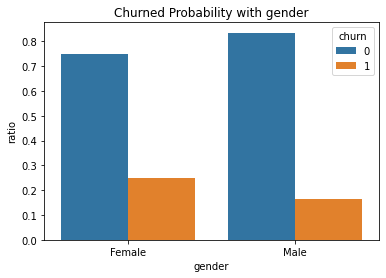

In [20]:
sns.barplot(x='gender',y='ratio', hue='churn', data=by_gender).set(title = 'Churned Probability with gender')

**Since the dataset is highly imbalanced, the churn rate for Females 25% and Males 16% while retention rate for Females is 74.9% and for Males is 83.5%.**

In [21]:
by_gender_country = df.groupby(['country', 'gender'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('country')
by_gender_country

,country,gender,churn,ratio
0,France,Female,0,0.796550
1,France,Female,1,0.203450
2,France,Male,0,0.872866
3,France,Male,1,0.127134
4,Germany,Female,0,0.624476
5,Germany,Female,1,0.375524
6,Germany,Male,0,0.721884
7,Germany,Male,1,0.278116
8,Spain,Female,0,0.787879
9,Spain,Female,1,0.212121


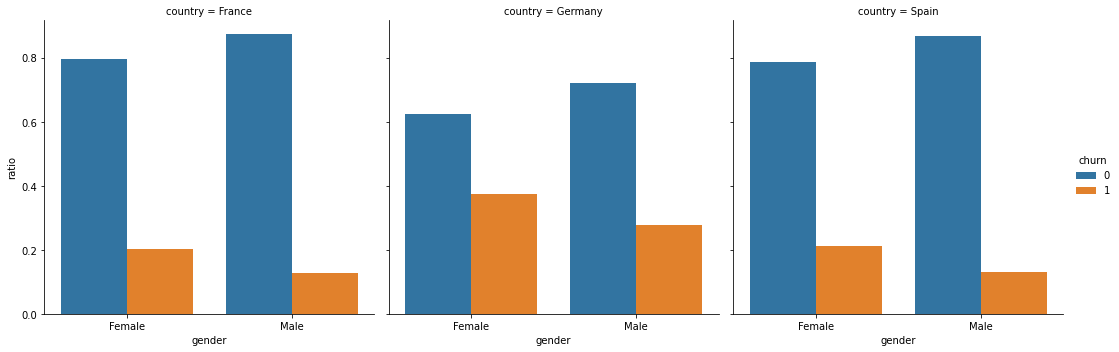

In [22]:
sns.catplot(x='gender',y='ratio', hue='churn', col='country', kind='bar', data=by_gender_country)

**Churned Probability with country and gender:**

1) Churn Rate for Females is higher than Males in all the countries.

2) Retention Rate for Males is higher than Females in all the countries.


#### Age

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


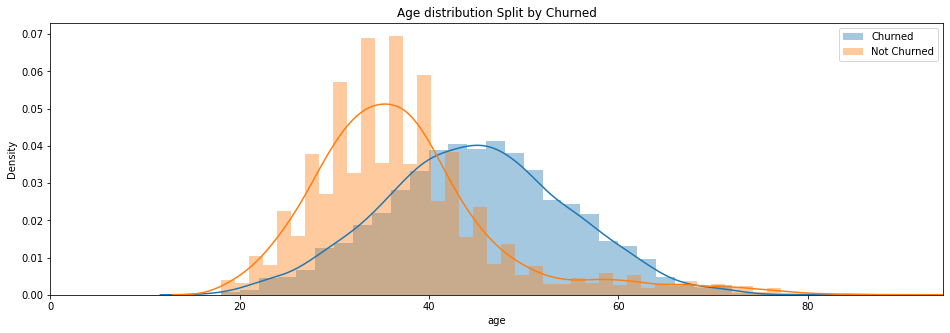

In [23]:
plt.figure(figsize=(16,5))
plt.title('Age distribution Split by Churned')
sns.distplot(df[(df['churn'] == 1)]['age'], label='Churned').set(xlim=(0))
sns.distplot(df[(df['churn'] == 0)]['age'], label='Not Churned').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()


In [24]:
by_age = df.groupby(['age'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('age')
by_age

,age,churn,ratio
0,18,0,0.909091
1,18,1,0.090909
2,19,0,0.962963
3,19,1,0.037037
4,20,0,0.950000
...,...,...,...
123,84,0,0.500000
124,84,1,0.500000
125,85,0,1.000000
126,88,0,1.000000


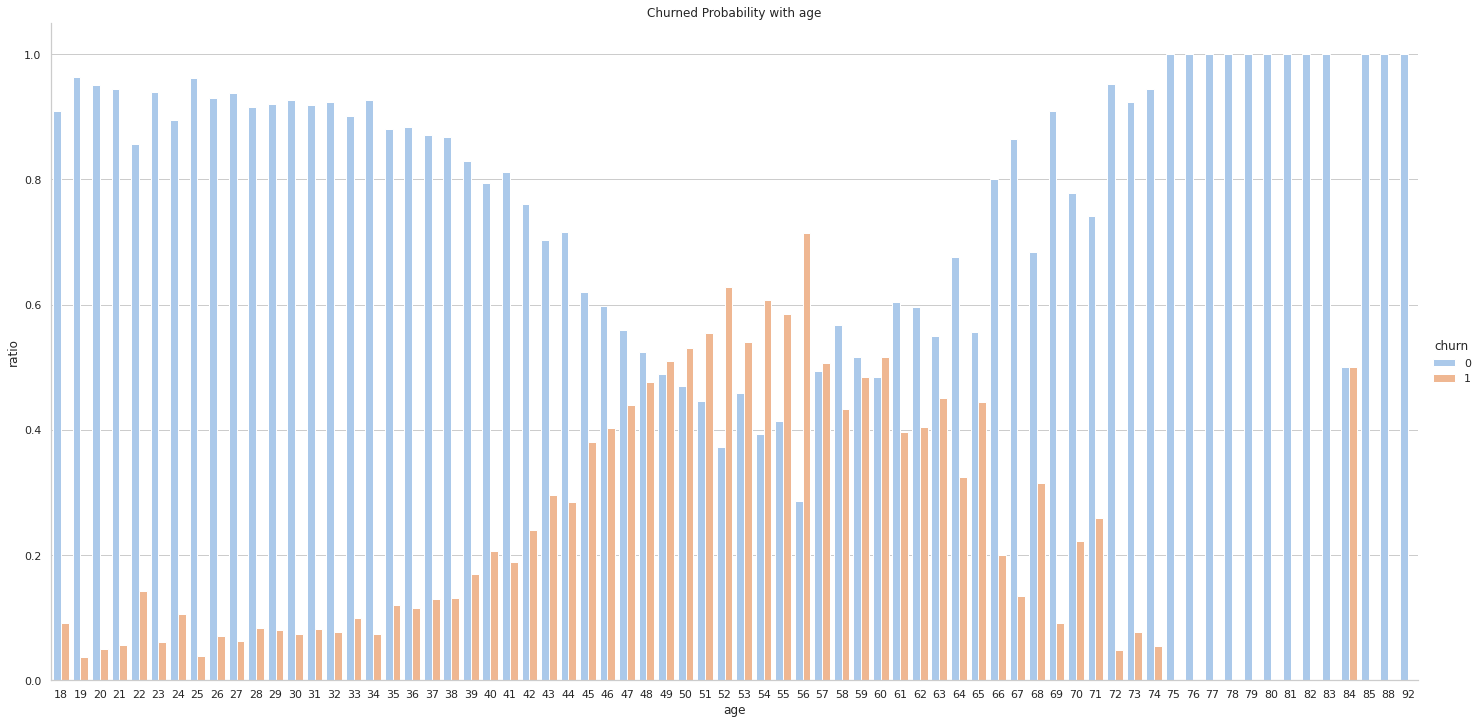

In [25]:
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='age',y='ratio', hue='churn',  kind='bar', data=by_age,height=10,aspect=2).set(title = 'Churned Probability with age')

**Younger customers made up most of the retained customer base while older customers made up most of the churned customer.**

#### Tenure

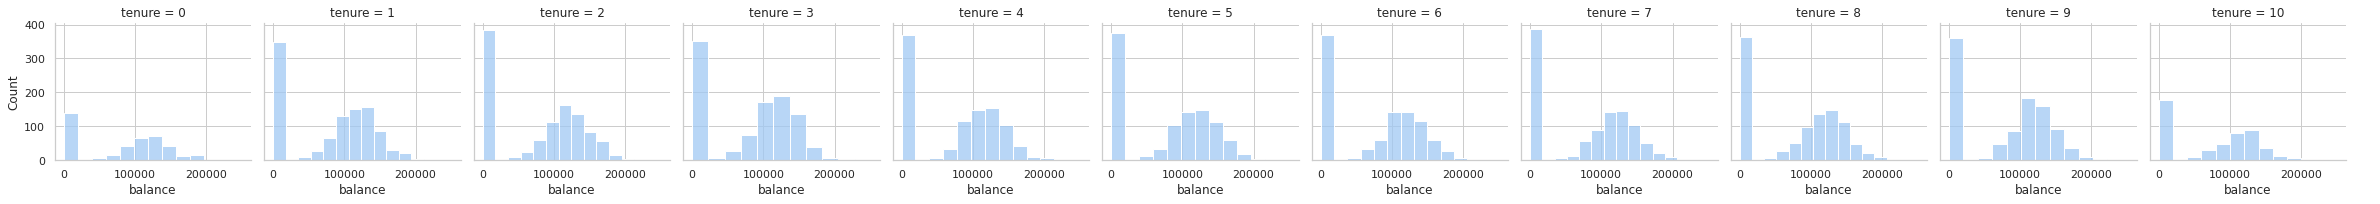

In [26]:
sns.FacetGrid(data = df, col = 'tenure').map(sns.histplot, 'balance').add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


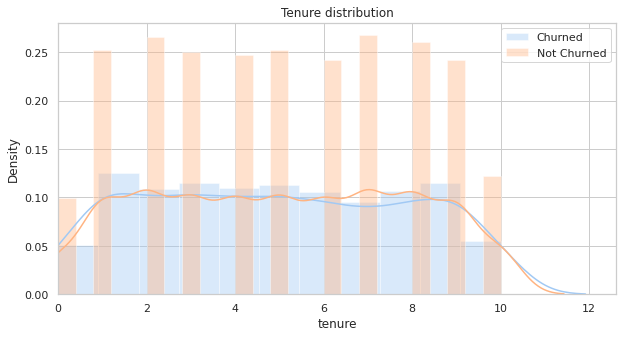

In [27]:
plt.figure(figsize=(10,5))
plt.title('Tenure distribution')
sns.distplot(df[df['churn'] == 1]['tenure'], label='Churned',hist=True, kde=True).set(xlim=(0))
sns.distplot(df[df['churn'] == 0]['tenure'], label='Not Churned',hist=True, kde=True).set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()

In our ABC Multinational Bank Dataset, Churn has no relationship with Tenure.

#### Credit Score

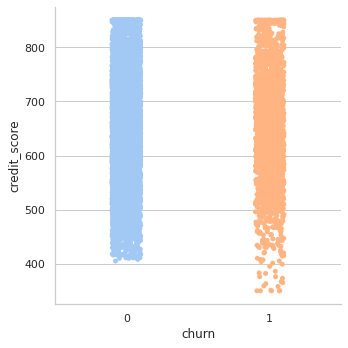

In [34]:
sns.catplot(data=df, x="churn", y="credit_score")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


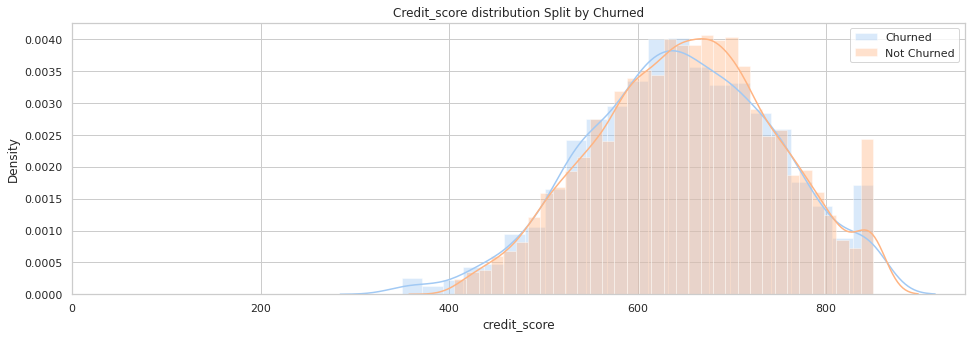

In [33]:
plt.figure(figsize=(16,5))
plt.title('Credit_score distribution Split by Churned')
sns.distplot(df[(df['churn'] == 1)]['credit_score'], label='Churned').set(xlim=(0))
sns.distplot(df[(df['churn'] == 0)]['credit_score'], label='Not Churned').set(xlim=(0))
plt.legend(loc= 'upper right')
plt.show()


Credit score is not a significant factor influencing churn.

#### Balance/ Estimated Salary

<AxesSubplot:title={'center':'Distributions of balance over both classes'}, xlabel='balance', ylabel='Density'>

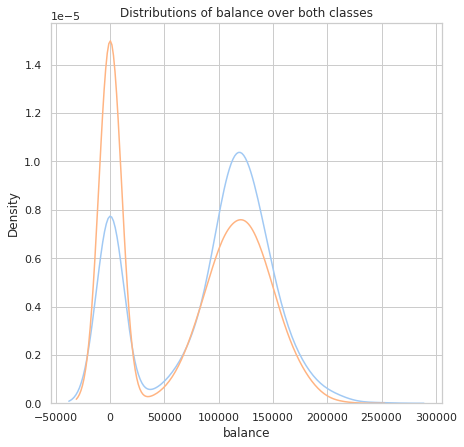

In [29]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 7))
ax1.set_title('Distributions of balance over both classes')

sns.kdeplot(data=df[(df['churn'] == 1)], x="balance", ax=ax1, label = 'churn')
sns.kdeplot(data=df[(df['churn'] == 0)], x="balance", ax=ax1, label = 'retention')

Customers with higher balance avoids churn.


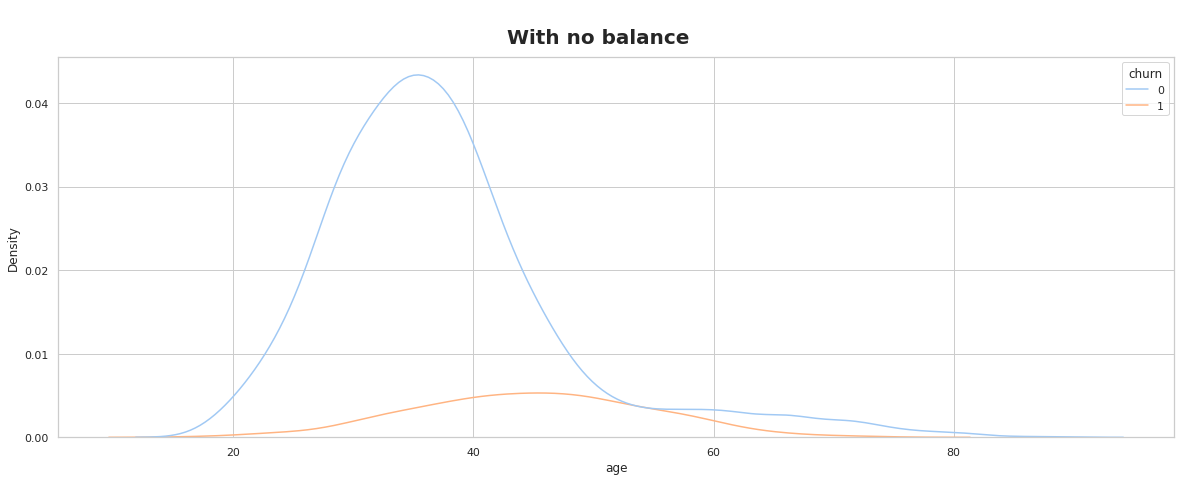

In [30]:
plt.figure(figsize = (20,7))
plt.suptitle('\n With no balance \n' , fontsize = 20 , weight = 'bold')
sns.kdeplot( x = 'age' , hue = 'churn' , data = df.query('balance == 0'));


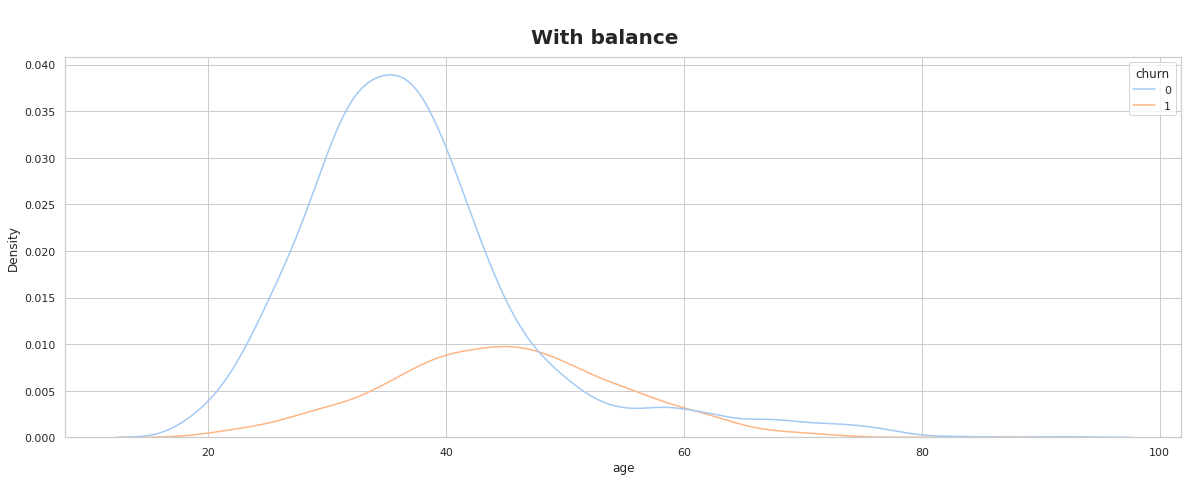

In [31]:
plt.figure(figsize = (20,7))
plt.suptitle('\n With balance \n' , fontsize = 20 , weight = 'bold')
sns.kdeplot( x = 'age' , hue = 'churn' , data = df.query('balance > 0'));


Whether the balance is at 0 or greater than 0, churn is concentrated in people around 48 years old.
Those with balance >0 will churn are those who are around 45 years old.

<AxesSubplot:title={'center':'Distributions of estimated_salary over both classes'}, xlabel='estimated_salary', ylabel='Density'>

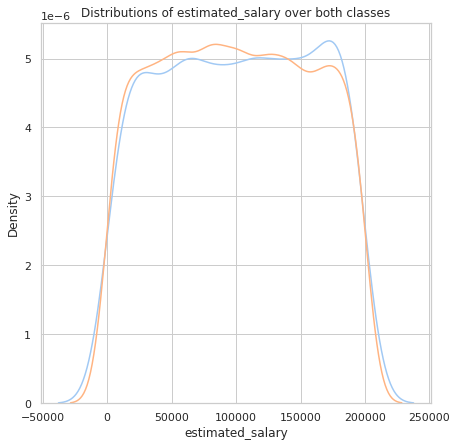

In [32]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 7))
ax1.set_title('Distributions of estimated_salary over both classes')

sns.kdeplot(data=df[(df['churn'] == 1)], x="estimated_salary", ax=ax1, label = 'churn')
sns.kdeplot(data=df[(df['churn'] == 0)], x="estimated_salary", ax=ax1, label = 'retention')

Estimated Salary doesn't play a role in churn or retention.

#### Active Memeber/ Credit_card/ No of products

<AxesSubplot:title={'center':'Activity Levels'}>

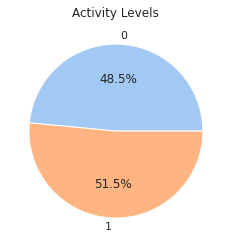

In [35]:
pd.crosstab(index=df.active_member,columns='count',normalize=True).plot(
    kind='pie',autopct='%.1f%%',y='count',    
    ylabel='',title='Activity Levels',legend=False)

48.5% of the bank’s customers were inactive 

In [36]:
by_active_member = df.groupby(['active_member'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('active_member')
by_active_member

,active_member,churn,ratio
0,0,0,0.731491
1,0,1,0.268509
2,1,0,0.857309
3,1,1,0.142691


In [37]:
 df.groupby(['active_member' , 'country' , 'gender'])['credit_card'].count().unstack().astype('int') \
.style.background_gradient(cmap = 'YlGnBu')

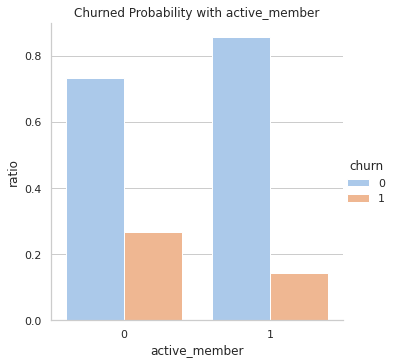

In [38]:
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='active_member',y='ratio', hue='churn',  kind='bar', data=by_active_member).set(title = 'Churned Probability with active_member')

People who are not active users are more likely to churn.

<AxesSubplot:xlabel='products_number', ylabel='count'>

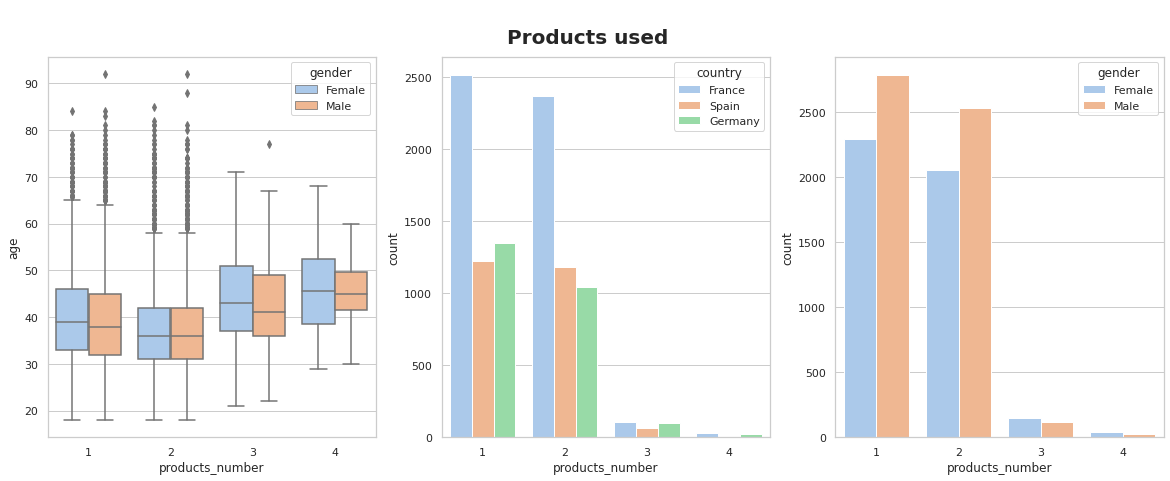

In [39]:
plt.figure(figsize = (20,7))
plt.suptitle('\n Products used \n' , fontsize = 20 , weight = 'bold')
plt.subplot(1,3,1)
sns.boxplot(x = 'products_number' , y = 'age' , hue = 'gender', data = df)
plt.subplot(1,3,2)
sns.countplot(x ='products_number' , hue = 'country' , data = df);
plt.subplot(1,3,3)
sns.countplot( x = 'products_number' , hue = 'gender' , data = df)

1.   Product number 1 has maximum users
2.   Product number 3 & 4 has majority users with median age more than 40 yrs 
3.   Product number 1 and 2 has majority users with median age less than 40 yrs which explains the less usage of product number 3 & 4.
4.   Females are leading users for Product number 3 & 4.

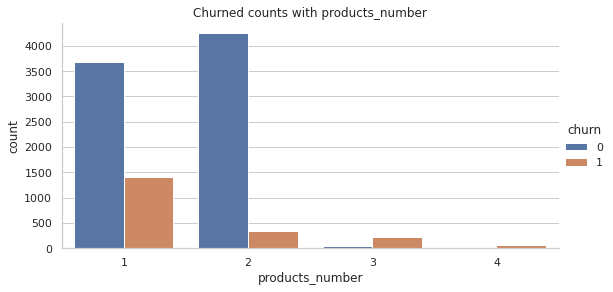

In [40]:
sns.set_theme(style="whitegrid", color_codes=True)#,context='notebook',palette='pastel')
sns.catplot(x='products_number', hue='churn',  kind='count', data=df,height=4,aspect=2).set(title = 'Churned counts with products_number')

Most of customers churned with 4 and 3 number of products.

<Figure size 1440x1080 with 0 Axes>

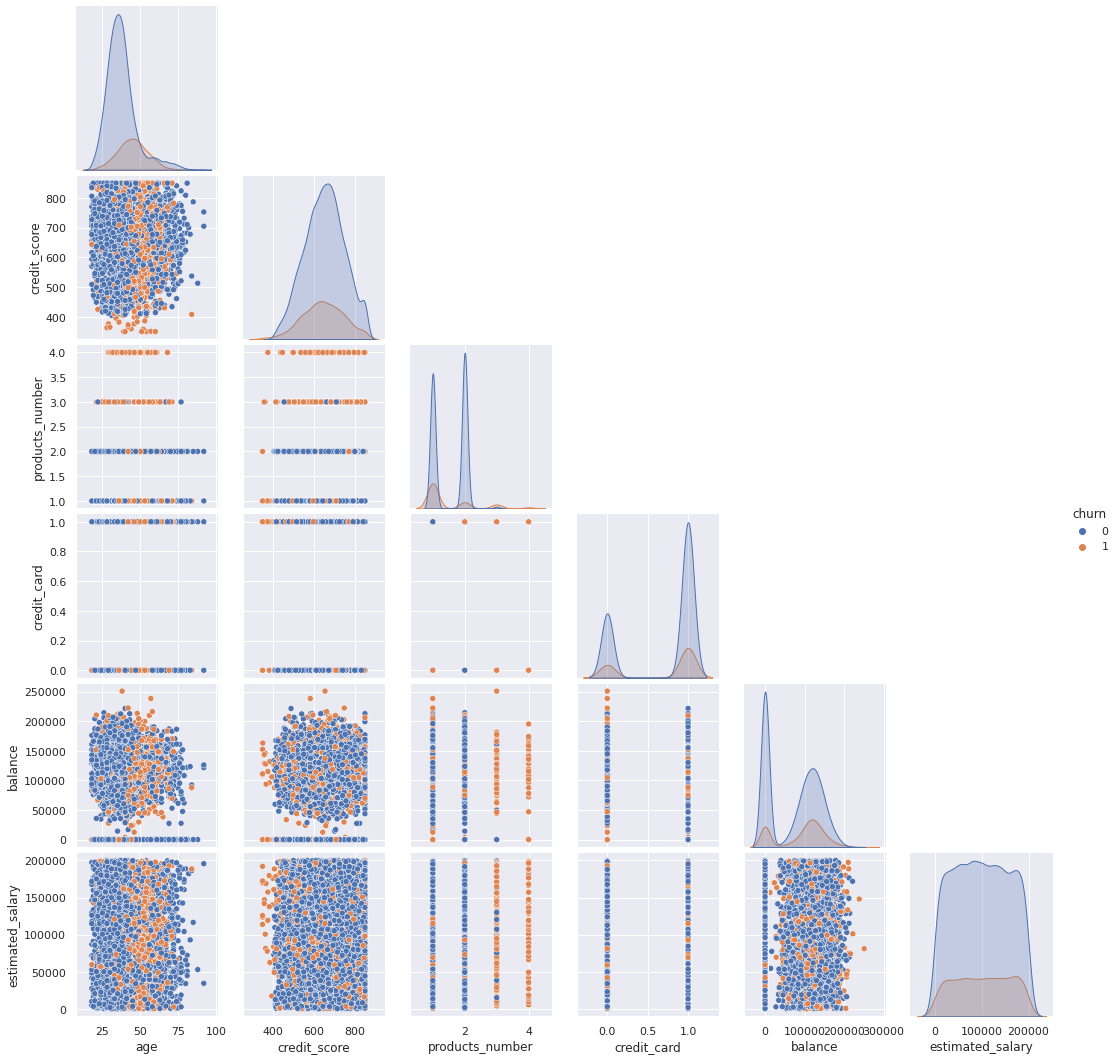

In [41]:
sns.set_theme()
plt.figure(figsize=(20,15))
sns.pairplot(data=df[["age","credit_score","products_number","credit_card","balance",'estimated_salary',"churn"]],hue='churn',corner=True)
plt.show()



1.   Age has a significant impact on churn results
2.   People with a balance over 20w who do not yet have a credit card will be more likely to churn
3.   People with low credit scores (under400) will like to churn regardless of their balance, whether they have a credit card or not, and whether their salary is high or low.








# Data Preprocessing

#### Feature Enginnering

In [42]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

No missing values or duplicates

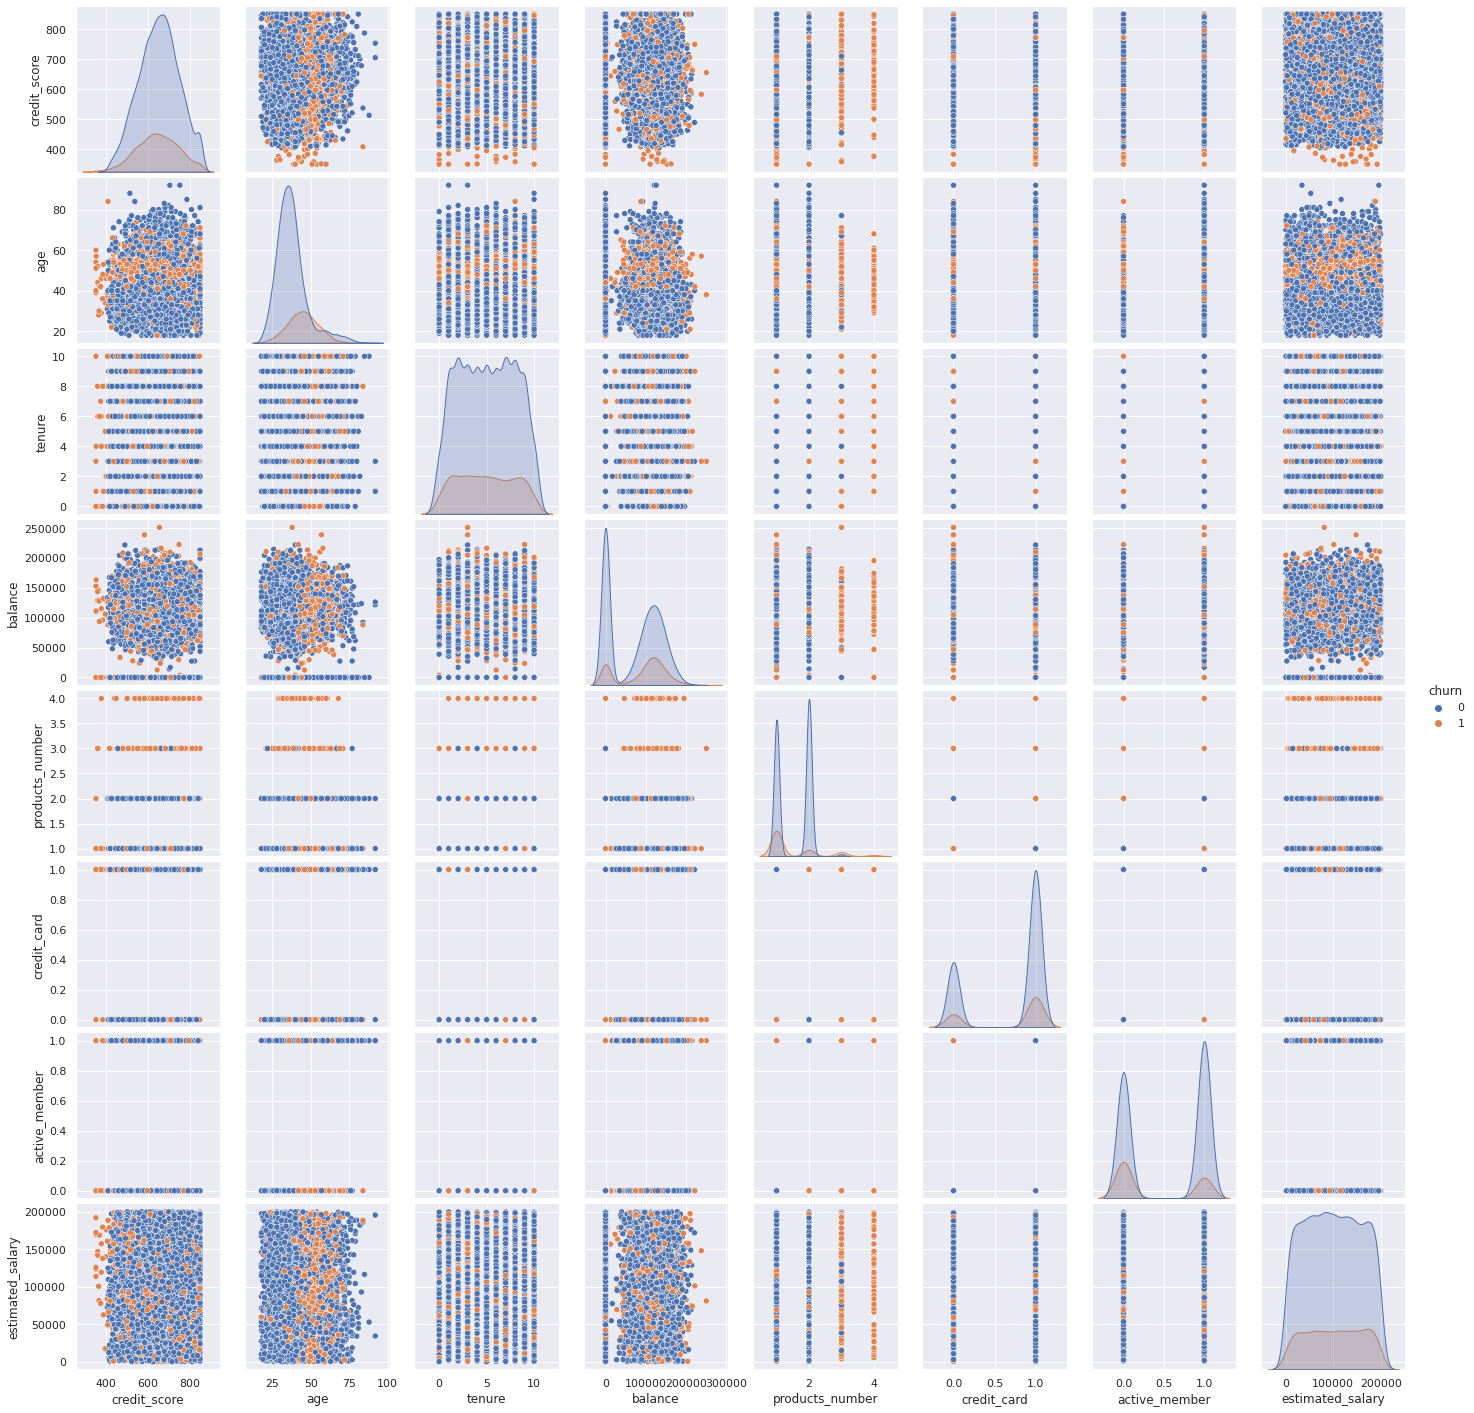

In [43]:
g = sns.pairplot(df[['credit_score', 'age', 'tenure','balance', 'products_number', 'credit_card', 'active_member','estimated_salary', 'churn']], hue = 'churn')

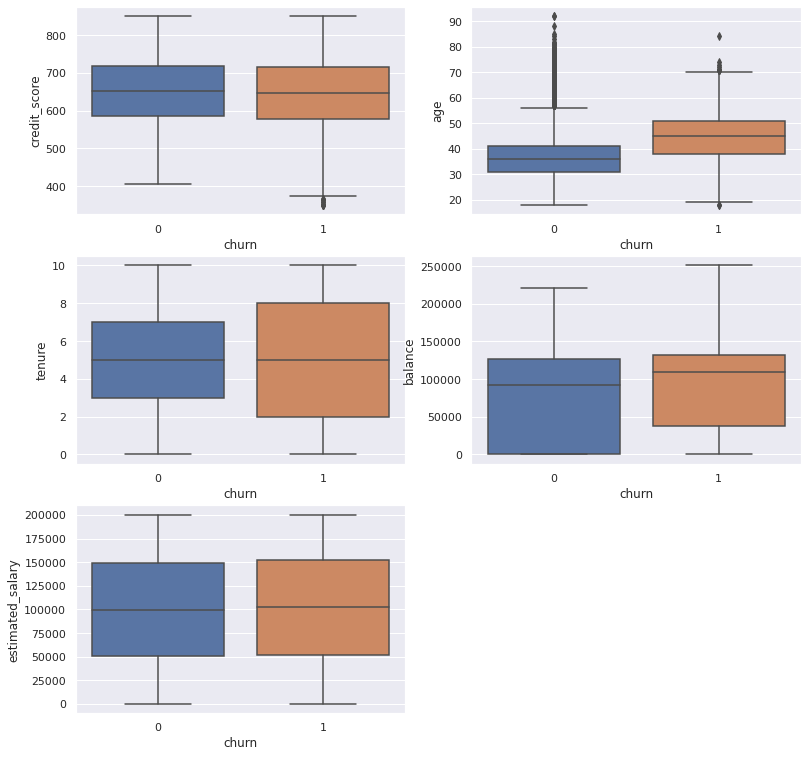

In [45]:
i = 1
col = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
fig = plt.figure(figsize = (13,13))
for c in col:
    plt.subplot(3,2,i)
    sns.color_palette("mako", as_cmap=True)
    sns.boxplot(x = 'churn', y=c, data = df)
    i = i+1

A credit score is a three-digit number designed to represent the likelihood you will pay your bills on time

300-579: Poor  
580-669: Fair  
670-739: Good  
740-799: Very good  
800-850: Excellent  

Hence, credit_score feature was engineered into categorical variable.

In [46]:
for i, data in df.iterrows():
  if data['credit_score'] in range(300, 580):
    df.at[i, 'Cat_cs'] = 'Poor'

  elif data['credit_score'] in range(580, 670):
    df.at[i, 'Cat_cs'] = 'Fair'

  elif data['credit_score'] in range(670, 740):
    df.at[i, 'Cat_cs'] = 'Good'

  elif data['credit_score'] in range(740, 800):
    df.at[i, 'Cat_cs'] = 'Very Good'

  elif data['credit_score'] in range(800, 851):
    df.at[i, 'Cat_cs'] = 'Excellent'


In [47]:
df['Cat_cs'].isnull().any()

False

In [48]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Cat_cs
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


In [49]:
df['Cat_cs'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Fair         33.3%
Good         24.3%
Poor         23.6%
Very Good    12.2%
Excellent     6.6%
Name: Cat_cs, dtype: object

<AxesSubplot:xlabel='age', ylabel='Count'>

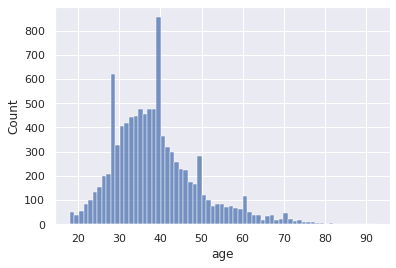

In [50]:
sns.histplot(df['age'])

In [51]:
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [52]:
Cat_age = pd.qcut(df.age,q=3,labels=['youth', 'adult', 'elderly'])
Cat_age.value_counts()

youth      3679
elderly    3215
adult      3106
Name: age, dtype: int64

A new feature was added which engineered feature Age into three sections youth, adult & elderly.

In [53]:
df.insert(5, 'Cat_age', Cat_age)

In [54]:
df.head()

,customer_id,credit_score,country,gender,age,Cat_age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Cat_cs
0,15634602,619,France,Female,42,elderly,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,608,Spain,Female,41,adult,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,502,France,Female,42,elderly,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,699,France,Female,39,adult,1,0.00,2,0,0,93826.63,0,Good
4,15737888,850,Spain,Female,43,elderly,2,125510.82,1,1,1,79084.10,0,Excellent


In [55]:
df.isnull().any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
Cat_age             False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
Cat_cs              False
dtype: bool

In [56]:
by_age = df.groupby(['Cat_age'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index()
by_age

,Cat_age,churn,ratio
0,youth,0,0.921174
1,youth,1,0.078826
2,adult,0,0.850290
3,adult,1,0.149710
4,elderly,0,0.601244
5,elderly,1,0.398756


##### Encoding

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int64   
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  object  
 3   gender            10000 non-null  object  
 4   age               10000 non-null  int64   
 5   Cat_age           10000 non-null  category
 6   tenure            10000 non-null  int64   
 7   balance           10000 non-null  float64 
 8   products_number   10000 non-null  int64   
 9   credit_card       10000 non-null  int64   
 10  active_member     10000 non-null  int64   
 11  estimated_salary  10000 non-null  float64 
 12  churn             10000 non-null  int64   
 13  Cat_cs            10000 non-null  object  
dtypes: category(1), float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
df = pd.get_dummies(df,columns=['country'], drop_first = True)

One hot encoding is a technique used to represent categorical variables as numerical values.In this technique, the categorical parameters will prepare separate columns for all three countries.

In [60]:
#Change value in gender column
df['gender'] = df['gender'].replace(['Female'],'1')
df['gender'] = df['gender'].replace(['Male'],'0')

df['gender'] = pd.to_numeric(df['gender'])

In [61]:
# Define a dictionary for encoding target variable
dict1 = {'youth':0,'adult':1,'elderly':2}

# Create the mapped values in a new column
df['age_encoded'] = df['Cat_age'].map(dict1)

In [62]:
df['age_encoded'] = pd.to_numeric(df['age_encoded'])

In [63]:
df['Cat_cs'].value_counts()

Fair         3331
Good         2428
Poor         2362
Very Good    1224
Excellent     655
Name: Cat_cs, dtype: int64

In [64]:
# Define a dictionary for encoding target variable
dict2 = {'Poor':0,'Fair':1, 'Good':2,'Very Good':3,'Excellent': 4}

# Create the mapped values in a new column
df['cs_encoded'] = df['Cat_cs'].map(dict2)

In [65]:
df['cs_encoded'].isnull().any()

False

In [66]:
df.head()

,customer_id,credit_score,gender,age,Cat_age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Cat_cs,country_Germany,country_Spain,age_encoded,cs_encoded
0,15634602,619,1,42,elderly,2,0.00,1,1,1,101348.88,1,Fair,0,0,2,1
1,15647311,608,1,41,adult,1,83807.86,1,0,1,112542.58,0,Fair,0,1,1,1
2,15619304,502,1,42,elderly,8,159660.80,3,1,0,113931.57,1,Poor,0,0,2,0
3,15701354,699,1,39,adult,1,0.00,2,0,0,93826.63,0,Good,0,0,1,2
4,15737888,850,1,43,elderly,2,125510.82,1,1,1,79084.10,0,Excellent,0,1,2,4


#### Feature Selection

In [67]:
df.columns

Index(['customer_id', 'credit_score', 'gender', 'age', 'Cat_age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'Cat_cs', 'country_Germany',
       'country_Spain', 'age_encoded', 'cs_encoded'],
      dtype='object')

In [68]:
df.dtypes

customer_id            int64
credit_score           int64
gender                 int64
age                    int64
Cat_age             category
tenure                 int64
balance              float64
products_number        int64
credit_card            int64
active_member          int64
estimated_salary     float64
churn                  int64
Cat_cs                object
country_Germany        uint8
country_Spain          uint8
age_encoded            int64
cs_encoded             int64
dtype: object

<AxesSubplot:>

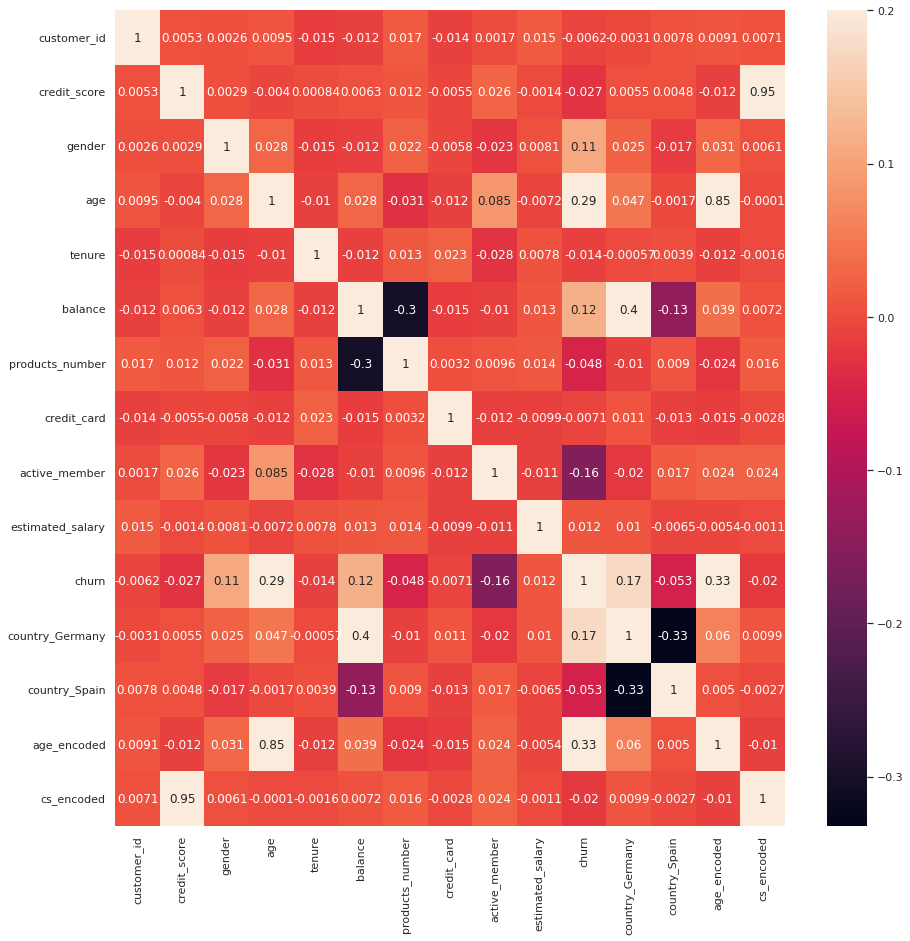

In [69]:
train_corr = df.corr(method = 'pearson')
fig = plt.figure(figsize = (15,15))
corrHeat = sns.heatmap(train_corr, annot=True,vmax=.2)
corrHeat

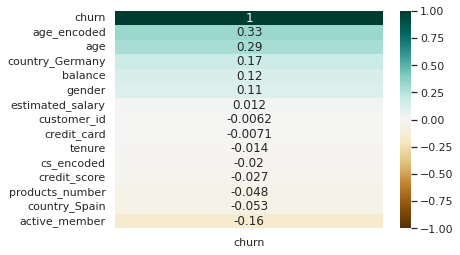

In [70]:
# Features correlation with target variable
heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Age plays a significant role in churn and is most important feature.

Top features: Age_encoded

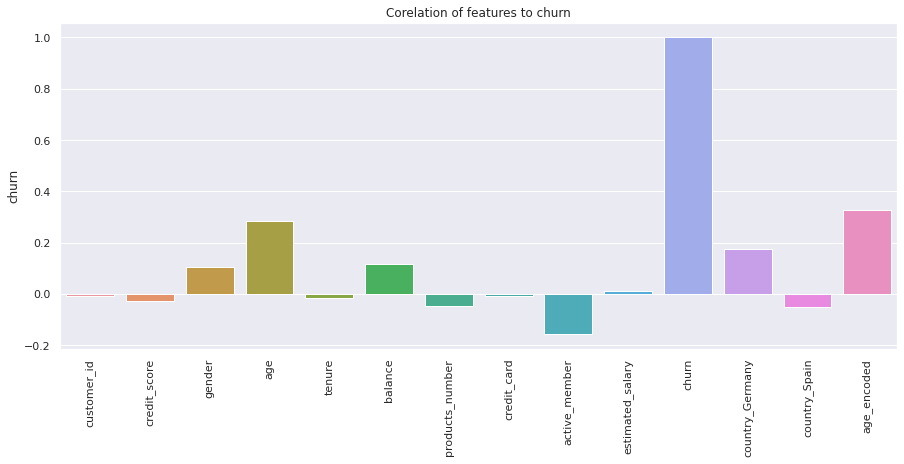

In [71]:
heatmap.set_title('Features Correlation with churn', fontdict={'fontsize':18}, pad=16);
corr = df.corr().churn
plt.figure(figsize = (15,6))
sns.barplot(x = corr[:-1].index, y = corr[:-1])
plt.title("Corelation of features to churn")
plt.xticks(rotation=90);


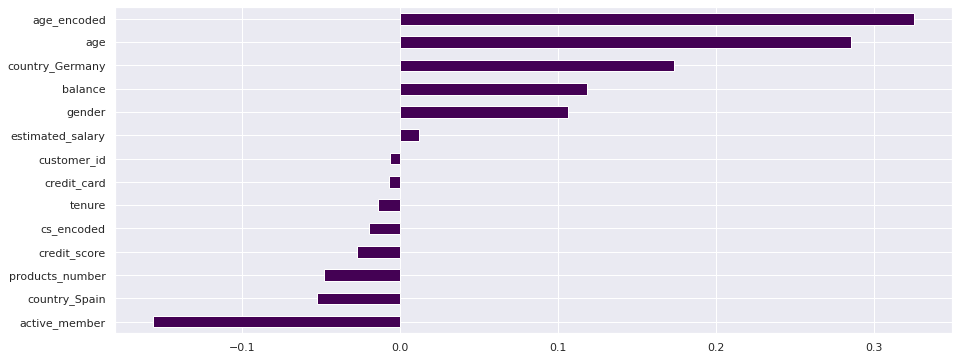

In [72]:
plt.figure(figsize = (15,6))
df.corr()['churn'].drop('churn').sort_values().plot.barh(cmap='viridis');


In [73]:
# print kurtosis of each attribute
for (colName, colData) in df[["credit_score","age", "balance","estimated_salary"]].iteritems():
    print("Feature name: {0}, Kurtosis: {1}".format(colName, stats.kurtosis(colData)))

Feature name: credit_score, Kurtosis: -0.42611279176518124
Feature name: age, Kurtosis: 1.3940495456392599
Feature name: balance, Kurtosis: -1.489267106315331
Feature name: estimated_salary, Kurtosis: -1.181527710874237


In [74]:
#to check whether following features are normally distributed
for col in df[["credit_score","age", "balance","estimated_salary"]].columns:
    jb, p = stats.jarque_bera(df[col])

    alpha = 0.05

    print("jb statistic value = {}".format(jb))
    print("p value = {}".format(p))

    if p > alpha:
        print(f"H0 can't be rejected . {col.upper()} is normally-distributed.")
    else:
        print(f"H0 can be rejected.  {col.upper()} is NOT normally-distributed.")
        
    print("-----------------------------------")

jb statistic value = 84.19832660649816
p value = 0.0
H0 can be rejected.  CREDIT_SCORE is NOT normally-distributed.
-----------------------------------
jb statistic value = 2513.842313254128
p value = 0.0
H0 can be rejected.  AGE is NOT normally-distributed.
-----------------------------------
jb statistic value = 957.3080391507327
p value = 0.0
H0 can be rejected.  BALANCE is NOT normally-distributed.
-----------------------------------
jb statistic value = 581.677133838223
p value = 0.0
H0 can be rejected.  ESTIMATED_SALARY is NOT normally-distributed.
-----------------------------------


In [75]:
df.head()

,customer_id,credit_score,gender,age,Cat_age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Cat_cs,country_Germany,country_Spain,age_encoded,cs_encoded
0,15634602,619,1,42,elderly,2,0.00,1,1,1,101348.88,1,Fair,0,0,2,1
1,15647311,608,1,41,adult,1,83807.86,1,0,1,112542.58,0,Fair,0,1,1,1
2,15619304,502,1,42,elderly,8,159660.80,3,1,0,113931.57,1,Poor,0,0,2,0
3,15701354,699,1,39,adult,1,0.00,2,0,0,93826.63,0,Good,0,0,1,2
4,15737888,850,1,43,elderly,2,125510.82,1,1,1,79084.10,0,Excellent,0,1,2,4


In [76]:
df1 = df.drop(df[['customer_id','credit_score','Cat_cs', 'age', 'Cat_age']], axis = 1)

1.   customer_id - is not needed in our machine learning modelling.

2.   credit score and cat_cs(categorical credit score) were encoded into separate feature(cs_encoded) and are hence dropped.

3.   age and cat_age(categorical age) were encoded into separate feature(age_encoded) and are hence dropped.


In [77]:
df1.to_csv('cleaned_df.csv')

In [78]:
from google.colab import files
df1.to_csv('cleaned_df.csv')

files.download('cleaned_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Key Insights

Based on the data available from he ABC Multinational Bank dataset below are the main insights grouped by category:



1.   Country : The French branches make up a huge portion of the customer base with 50.1% followed by Spain 25.1% and Germany 24.8%. German branches recorded the highest churn rate with 32% hence further analysis should be required by buisness to determine why.

2.   Gender: The gender split between the male and female customers was 54.6% and 45.4% respectively.Most of the churned customers turned out to be women so further analysis is required to find out the cause.

3.   Age: Younger customers made up most of the retained customer base while older customers made up most of the churned customer so efforts should be made to acquire and understand the young customers. Analysis should also be carried out to determine why older customers were more likely to leave.

4.   Tenure: We found that Churn has no relationship with Tenure.

5.   Credit Scores: The credit scores of most customers of the bank are generally considered to be above the good threshold. Notwithstanding, good credit scores were not enough to deter customers from churning out.

6.   Balance: Customers with higher balance avoids churn.Whether the balance is at 0 or greater than 0, churn is concentrated in people around 48 years old. Those with balance >0 will churn are those who are around 45 years old.

7.   Estimated Salary: Estimated Salary doesn't play a role in churn or retention.

8.   Activity Levels: A whooping 48.5% of the bank’s customers were Inactive which is far from ideal; hence, analysis would be required to determine the cause of the high percentage of inactive members. People who are not active users are more likely to churn. Majority of the churned customers left after one year with the bank; although it is important to note that customers still left after spending a considerable amount of time at the bank.

9.   Purchased Products: Customers that purchased more products through the bank tended to be churned as 100% of the customers that purchased 4 products left and 79% of those that purchased 3 products also being churned out. Analysis is required to determine why customers that bought more products with the bank ended up leaving the bank, as none of the customers that bought 4 products with the bank were retained.

Churn Rate The bank recorded a churn rate of 20.3% which is below the average churn rate for financial institutions which is 25%. 

